# Computing Bootcamp II -- Pandas and Seaborn
Giorgio Sarro - gmsarro@uchicago.edu

Today we will focus on `pandas` and its multiple tricks to read and run operation in tabular formats. We will add some cool plots that one can do with Seaborn.



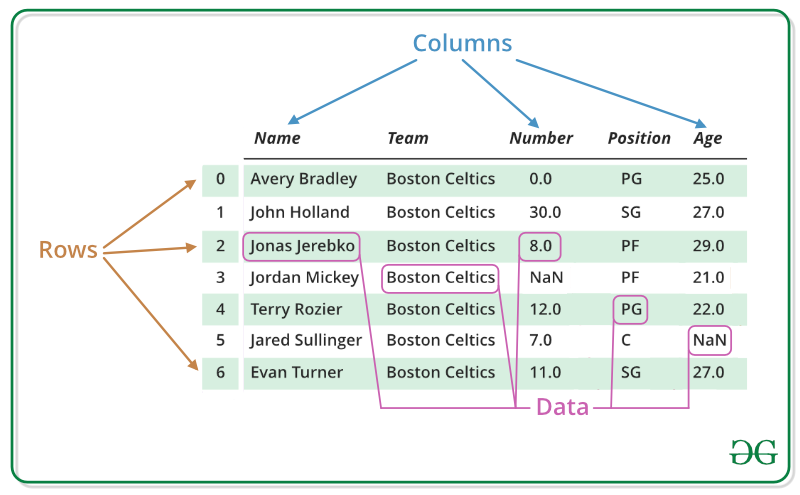


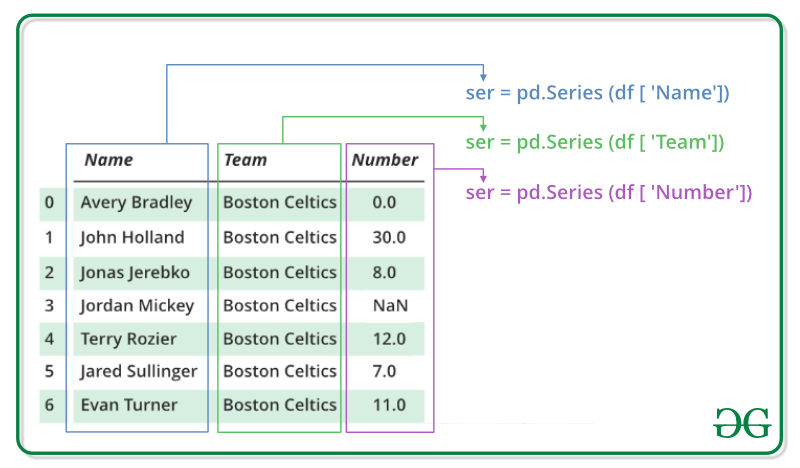

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt    
import re
import seaborn as sns

## Section 1. Data structures in `pandas`

We have several data structure in `pandas`. As you will see, some of this structures are similar to `numpy` arrays. In essence, they are indexed arrays with similar functionality as our good old `ndarrays`.



### 1.1. Series

Let's explore `pd.Series` and how to slice it:

In [ ]:
temp = pd.Series([40.0, 41.0, 39.0, 39.0, 19.0, 15.0, 11.0], name='Temperature')
temp

In [ ]:
temp.index

In [ ]:
temp = pd.Series([40.0, 41.0, 39.0, 39.0, 19.0, 15.0, 11.0], 
                 index=['a', 'b', 'c', 'd', 'e', 'f', 'g'],
                 name='Temperature')
temp

In [ ]:
temp['a':'c']

We can use our `index` property to slice our `pd.Series` and filter data. The `index` object will be ubiquous within `pandas` and has important properties and functions to make our life easier. Indices can be complex, include more than one attribute and data type. For instance:

In [ ]:
temp = pd.Series([40.0, 41.0, 39.0, 39.0, 19.0, 15.0, 11.0], 
                 index=pd.date_range('2020-01-01', '2020-01-07', freq='D'),
                 name='Temperature')
temp

In [ ]:
# .loc is an accesor that allow us to use the index of any pandas object. Is useful to avoid confusions. 
temp.loc['2020-01-01':'2020-01-04']

In [ ]:
temp[(temp < 20)]

In [ ]:
avg_temp = temp.mean()
print(f'The average temperature in Chicago is: {avg_temp}')

#### Check-in [# 1]

We have covered how to play with `pd.Series`, now calculate the year temperature mean using the data below 

_The data is a random generated array using a normal distribution. Numpy rocks._

In [ ]:
"""
Use this data and use this block to code your answer
"""

temp_tropical = np.random.default_rng().normal(20, 5, 366)
day_objs = pd.date_range('2020-01-01', '2020-12-31', freq='D')


### 1.2 DataFrames

`DataFrames` are a collection of `Series`:  

In [ ]:
temperature = pd.Series({'2020-01-01': 40.0,
                         '2020-01-02': 41.0,
                         '2020-01-03': 39.0,
                         '2020-01-04': 39.0,
                         '2020-01-05': 19.0,
                         '2020-01-06': 15.0,
                         '2020-01-07': 11.0})

rainfall = pd.Series({'2020-01-01': 2.0, 
                      '2020-01-02': 0.0, 
                      '2020-01-03': 0.1, 
                      '2020-01-04': 0.0, 
                      '2020-01-05': 0.4, 
                      '2020-01-06': 0.7, 
                      '2020-01-07': 0.8})

df = pd.DataFrame({
    'temp': temperature,
    'rainfall': rainfall
})
df

In [ ]:
df['temp']

In [ ]:
df.temp.mean()

As you can see in the above cells, you can select columns by either slicing using the column name: `df[<column name>]`, or by using the column name as a key (just as a `dict`!): `df.<column name>`. But **BEWARE**, if column is called `mean`, `pop`, or any other `pandas` method, you might have conflicts. 

In [ ]:
df['anomaly'] = df['temp'] - df.temp.mean()
df

Creating new columns is easy peacy! 

Let us remember that a `pd.DataFrame` is not very different that a multidimensional `np.array`:

In [ ]:
df.values

In [ ]:
df.values.T

#### Check in [# 2]

We have learn how to slice data in our manually created `DataFrame` (`df`). Now, calculate rainfall anomaly and return the dates where the anomaly is negative. 

In [ ]:
"""
Your code for the challenge should go here!
"""



As we did above with the `pd.Series`, the same methods works for `pd.DataFrames`. You can use `loc` to use the index (both index of columns and rows). For clarity, let us see that: 
  - Index: row names
  - Columns: column names (index of columns!)


In [ ]:
df.loc['2020-01-01':'2020-01-03', 'anomaly']

Another option is to use Python naive indices

In [ ]:
df.iloc[0:5, 1]


You can also use logic indexing, just as a fast way to filter our data

## Ways of quickly looking in your dataset:


In [ ]:
# VIEW THE FIRST FEW ROWS
df.head()

In [ ]:
# VIEW THE LAST 3 ROWS
df.tail(3)

In [ ]:
# VIEW THE INDICES OF THE DATAFRAME
df.index

In [ ]:
# VIEW THE COLUMN HEADERS OF THE DATAFRAME
df.columns

In [ ]:
# describe() shows a quick statistical summary of your data
df.describe()

In [ ]:
# SORT THE DATAFRAME BY TEMPERATURE
df.sort_values(by='temp')

In [ ]:
# SORT THE DATAFRAME BY TEMPERATURE, FROM HIGHEST TO LOWEST
df.sort_values(by='temp', ascending=False)

## Section 2. Data wrangling: An example on how to open data using `pandas`
Let's jump now to how to read and write data from `pandas`. Pandas is extremely flexible and can read a vast array of data formats, including challenging text formats, and even hierarchical formats as `json`. The most widely format for tabular data is CSV (comma-separated-values) or any sort of text files with specific separators (can be a `tab`, or basically anything). 

We saw in out last session an example of reading a CSV file from disk. But we can also read CSV files from any place on the internet, or even compressed files. `pandas` will handle everything for us. 

For this purpose we will use the [NOAA Integration Surface Database](https://www.ncdc.noaa.gov/isd). This data source contain more than 35,000 weather stations around the world. Data is storaged in a FTP server (but also a HTML server) and files are stored by year and station. 


### 2.1 Reading tabular data from an URL

In [ ]:
url_inventory_stations = 'ftp://ftp.ncdc.noaa.gov/pub/data/noaa/isd-history.csv'
station_inventory = pd.read_csv(url_inventory_stations,
                                parse_dates=['BEGIN', 'END'],
                                dtype=str)
station_inventory.head()

### 2.2. Cleaning missing data and renaming columns

Just as in `numpy`, we have missing data. We can drop missing data in `pandas` using the `dropna` method and controlling which rows (or columns) we need to drop. 

In [ ]:
station_inventory =  station_inventory.dropna()

# We can also change the names
station_inventory.rename(columns={
    'USAF': 'usaf',
    'WBAN': 'wban',
    'STATION NAME': 'station_name',
    'CTRY': 'country',
    'STATE': 'state',
    'ICAO': 'icao_code',
    'LAT': 'lat',
    'LON': 'lon',
    'ELEV(M)': 'elevation',
    'BEGIN': 'start_date_service',
    'END': 'end_date_service'
}, inplace=True)

station_inventory.head()

### 2.3. Indices and Slicing

We have a plethora of ways to select data in `pandas`. Some are more efficient than others. Let's explore some of them in this section, and to differentiate between them let's also introduce indexing :) 

In [ ]:
station_inventory['station_code'] = station_inventory['usaf'] + station_inventory['wban']
station_inventory.head()

In [ ]:
station_inventory.set_index('station_code', inplace=True)
station_inventory.head()

We can then slice using the `Index` ( using `loc`):

In [ ]:
station_inventory.loc['69007093217']

Or we can use the pythonic index (row order) with `iloc`:

In [ ]:
station_inventory.iloc[0]

In [ ]:
station_inventory.loc['69007093217':'69018599317']

We can get rid of `Index` and change it to another one (or simply not use one -- Pandas uses a `RangeIndex` by default). 

In [ ]:
station_inventory.reset_index()

Just to show the power of indices, let's make the `start_date_service` our new `Index`

In [ ]:
station_inventory = station_inventory.reset_index().set_index('start_date_service')

In [ ]:
station_inventory.loc['2020-01-01':'2020-08-01']

We can also use logic statements to slice our `DataFrame`:

In [ ]:
station_inventory[(station_inventory.country == "US")].head()

`Pandas` has some built logics:

In [ ]:
list_states = ['MN', 'IL']
station_inventory[(station_inventory.state.isin(list_states))].head()

In [ ]:
station_inventory[(station_inventory.state.isin(list_states))].state.value_counts()

We can use more than one!

In [ ]:
station_inventory[(station_inventory.country == "US") &
                  (station_inventory.state == 'IL')].head()

### Additional data manipulation:

Let us find all the stations that match the name "CHICAGO". In other settings, we would try something like the following: 

In [ ]:
stations_il = station_inventory[(station_inventory.country == "US") &
                  (station_inventory.state == 'IL')]
stations_il

In [ ]:
matches = [bool(re.match(r"CHICAGO", name)) for name in stations_il.station_name.tolist()]
stations_il[matches]

But `pandas` offers us the `str` accesor that allow us to make any type of string operation, like a string search. There's many functions included in `str`:

In [ ]:
stations_il[stations_il.station_name.str.startswith('CHICAGO')]

In [ ]:
stations_il.reset_index(inplace=True)

### 2.3 Date operations 

We can also use date accesors, and these are extremely powerful. Before jumping into those we can talk a little a bit dates. Dates in Python aren't American, they follow the ISO date standard: `yyyy-mm-dd`, although, you can use any format of your preference. 

Most climate data follows the UTC, so time transformation is not always needed. But in case you need that, you can always rely on the `pytz` library. 

In [ ]:
stations_il.end_date_service.dt.year

In [ ]:
stations_il.end_date_service.dt.quarter

In [ ]:
stations_il['age'] = (stations_il.end_date_service - stations_il.start_date_service) / np.timedelta64(1, 'Y')
stations_il

In [ ]:
stations_il[(stations_il.station_name.str.startswith('CHICAGO')) & 
            (stations_il.age > 40)]

#### Check-in [# 3]

Using the `stations_il` data, calculate the station mean age.

In [ ]:
"""
Use this cell to code the answer to the question. 
"""



# Read and Create a local Excel spreadsheet + Seaborn

In [ ]:
local_file = pd.read_excel('ibtracs.xlsm')

In [ ]:
local_file

Matplotlib can be incorporated into Pandas to plot colums:

In [ ]:
matches = [bool(re.match(r"HARVEY", name)) for name in local_file.NAME.tolist()]
data = local_file[matches]
data = data.dropna(subset=['WMO_WIND'])
harvey_2017 = data[data.SEASON == 2017]


fig, ax = plt.subplots(figsize=(10, 10))
harvey_2017.WMO_WIND.plot(ax=ax)

Why did this happen?
Remember that in Pandas, datatypes are important to perform calculations and plotting.

If we don't like the datatype panda chose, we can force it and make it what we prefer.

In [ ]:
data['WMO_WIND'].dtype

In [ ]:
data['WMO_WIND']

In [ ]:
matches = [bool(re.match(r"HARVEY", name)) for name in local_file.NAME.tolist()]
data = local_file[matches]
data['WMO_WIND'] = pd.to_numeric(data['WMO_WIND'], errors = 'coerce')
data['LAT'] = pd.to_numeric(data['LAT'], errors = 'coerce')
data['LON'] = pd.to_numeric(data['LON'], errors = 'coerce')
data = data.dropna(subset=['WMO_WIND'])
harvey_2017 = data[data.SEASON == 2017]


fig, ax = plt.subplots(figsize=(10, 10))
harvey_2017.WMO_WIND.plot(ax=ax)

### Other than what we learned before, a way to analyze the dataset is by using Seaborn:

In [ ]:
# Create a visualization
sns.relplot(
    data=harvey_2017,
    x="LON", y="LAT", hue="WMO_WIND", style="NATURE",  size="WMO_WIND")

### #4 Plot the track and intensity of hurricane Sandy (2012):

In [ ]:
# Write your solution here:


We can also do other cool things with seaborn, here a few examples:

In [ ]:
local_file['WMO_WIND'] = pd.to_numeric(local_file['WMO_WIND'], errors = 'coerce')
local_file['LAT'] = pd.to_numeric(local_file['LAT'], errors = 'coerce')
local_file['LON'] = pd.to_numeric(local_file['LON'], errors = 'coerce')
local_file['SEASON'] = pd.to_numeric(local_file['SEASON'], errors = 'coerce')
local_file = local_file.dropna(subset=['WMO_WIND'])


sns.displot(data=local_file, x='SEASON', kde=True)

In [ ]:
local_file['ACE'] = 1e-4* local_file['WMO_WIND']**2 
final_ace  = (local_file.groupby(["SEASON"]).sum()).reset_index()

In [ ]:
sns.catplot(data=final_ace, kind="bar", x="SEASON", y="ACE", height=8.27, aspect=11.7/8.27)
#plt.xticks(rotation= 90)

![title](Accumulated_Cyclone_Energy_of_North_Atlantic_hurricanes,_OWID.svg.png) 

https://en.wikipedia.org/wiki/Accumulated_cyclone_energy#/media/File:Accumulated_Cyclone_Energy_of_North_Atlantic_hurricanes,_OWID.svg

## Create your own Excel:

In [ ]:
file_name = 'Harvey_2017.xlsx'
  
# saving the excel
harvey_2017.to_excel(file_name)

That's all!
Alternatively:

In [ ]:
harvey_2017.to_csv('Harvey_2017.csv')

# Project: (people will be divided in break-out rooms)

Find the number of cyclones that underwent Extratropical Transition (marked as ET in the Nature column) from 1995 to today, and then plot it using you favorte plotting method. 

# For more Pandas hungry people, I left here some code from last year.

(credit: Ivan Higuera-Mendieta)

## Section 3: _split-apply-combine_

[Split-apply-combine](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjl9Ouk2bTrAhXAGTQIHenuDkEQFjAIegQIAxAB&url=https%3A%2F%2Fwww.jstatsoft.org%2Farticle%2Fview%2Fv040i01%2Fv40i01.pdf&usg=AOvVaw24pR8THTUXR9PIgEd0ZHjG) is a traditional way of processing data. 

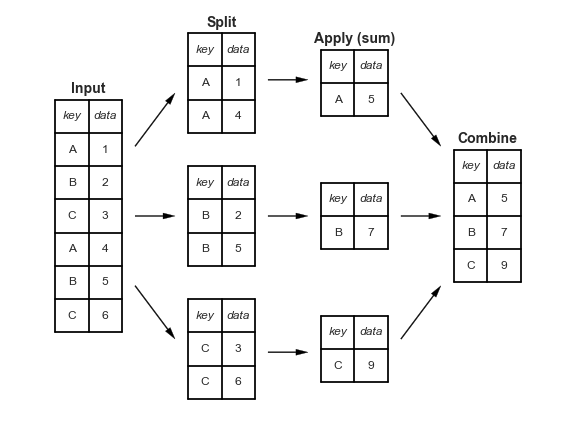

Again, people coming from `R` will find this pretty familiar, and it is. This is a Hadley Wickham idea. Let's get some station data using what we learn above. Since you are intermediate programers, is time to get things a little bit more complex ;) 

In [ ]:
year = 2020
station_code = '72530094846'

base_url = 'https://www.ncei.noaa.gov/data/global-hourly/access' 
url_station = f"{base_url}/{str(year)}/{station_code}.csv"

chicago_ohare = pd.read_csv(url_station)
chicago_ohare.head()

We can change columns in a more programatic way instead of using `rename`. This is useful when you have a lot of columns, as this case. 

In [ ]:
chicago_ohare.columns = [str(col).lower() for col in chicago_ohare.columns.tolist()]
chicago_ohare.head()

### 3.1 Data filtering (review)

In [ ]:
chicago_ohare = chicago_ohare[chicago_ohare.report_type == 'FM-15']

In [ ]:
chicago_ohare = chicago_ohare.filter(['station', 'date', 'name', 'tmp'])
chicago_ohare.head()

### 3.2. Data cleaning: Several data fields in column

This aren't always what you expect!

All seems good, but `tmp` seems weird. Reading the documentation we see that `tmp` has data, but also a quality assurance value that is appened to the data. On top of that, the temperature is also in a 100-scale, so we need to divide it by 100

In [ ]:
chicago_ohare['tmp'].apply(lambda x: float(str(x).split(',')[0])/10)

#### Life lesson [# 1]: always check your data types 

Timestamps also seem to be weird, we can use our `datatime (dt)` methods to deal with this timestamps. Here, we can normalize the timestamp to the closest hour.

In [ ]:
chicago_ohare['date'].dt.floor('1H')

What happened here? Any ideas? 

In [ ]:
chicago_ohare.dtypes

In [ ]:
pd.to_datetime(chicago_ohare['date']).dt.floor('1H')

In [ ]:
pd.to_datetime(chicago_ohare['date']).dt.round('60min')

**AMAZING**

#### Life Lesson [# 2] - How to clean data efficiently

Standarize your data cleaning processes, this is helpful for several reasons:
 - Apply same cleaning to similar `DataFrames`
 - Split big big `DataFrames` and clean them all in parallel! 


In [ ]:
from urllib.parse import urljoin

def clean_noaa_station_df(df,
                         time_period=None):
    """Clean station year reports coming from NOAA-ISD

    Parameters:
     - df pd.DataFrame object with raw data
     - time_period list with strings of dates to filter the raw data

    Return:
    pd.DataFrame
    """

    df.columns = [str(col).lower() for col in df.columns.tolist()]
    keep_columns = ['tmp', 'station', 'date', 'name']
    report_type = 'FM-15'

    try:
        df['date'] = pd.to_datetime(df['date']).dt.round('60min')
        df = df[df.report_type == report_type]
        df.set_index('date', inplace=True)

        if time_period is not None:
            df_filter = df.loc[time_period[0]:time_period[1]]
        else:
            df_filter = df

        df_filter = df_filter.filter(keep_columns)
        df_filter['tmp'] = df_filter['tmp'].apply(
            lambda x: float(str(x).split(',')[0])/10
        )

        df_filter = df_filter[df_filter['tmp'] != 999.9]
        df_filter.reset_index(inplace=True,
                            drop=False)
        
        df_filter = df_filter.drop_duplicates(["date", "station"])

    except Exception as e:
        print(f'Error during cleaning: {e}')

    return df_filter

'''
Run our function for a list of functions:

 - Notice the use of list comprehensions to facilitate the process and
   avoid looping -- is usually hard to read.
'''

year = 2020
station_codes = ['72530094846', '72534014819']
base_url = 'https://www.ncei.noaa.gov/data/global-hourly/access' 

raw_data = [pd.read_csv(f"{base_url}/{str(year)}/{station_code}.csv",
                        dtype='str') 
           for station_code in station_codes]

clean_data = [clean_noaa_station_df(data) for data in raw_data]

chicago_weather = pd.concat(clean_data)
chicago_weather

### 3.3 Let's `groupby`

When grouping by we are dividing our data by one or several variables and then applying a function to it. Most of the times, we are aggregating data and we have a set of predefined functions to apply to each of our groups (i.e. `mean()`, `min()`, `max()`, `last()`, `first()` etc.)

For instance, we can calculate the `mean` temperature for our two stations in the city. 

In [ ]:
chicago_weather.groupby('station').tmp.mean()

`describe()` is cool, but you don't have much control over the operations or their order. You can use `agg` to pass several operations. Notice that you can use `pandas` methods by passing a string function, or you can use other predefined functions (like `np.median`)

In [ ]:
chicago_weather.groupby('station').tmp.agg(mean='mean',
                                           median=np.median,
                                           min='min',
                                           max='max')

Below the hood `groupby` is creating an iterator of dataframes splitted by the grouping key. We can use this object in a loop and make calculations:

In [ ]:
for g, df in chicago_weather.groupby(['station']):
    print(f'Group {g} has shape: {df.shape}')

### 3.4 Let's `groupby` using time

You can also apply more complex operations and group by using time. `pandas` is powerful enough to use the `date` columnn to calculate different grouping windows. We have two options when using time: `resample` and `Grouper`. 

In [ ]:
chicago_weather['tmp_demean'] = chicago_weather.groupby('station').tmp.transform(lambda x: x - x.mean())
chicago_weather.head()

In [ ]:
chicago_weather.set_index('date').resample('M').tmp.mean()

`resample` relies on the `Index` of the `DataFrame` to calculate aggregations. This is why we first use `set_index` to tell pandas to index our data by `date`. Sometimes we don't want to index our data, so `Grouper` has our backs.

In [ ]:
chicago_weather.groupby(pd.Grouper(key='date', freq='M')).tmp.quantile()

### 3.5 Advanced `groupby`

Sometimes we want to execute more complex functions in time where the aggregation might change. A good example of this are the rolling windows where the group changes with time.

In [ ]:
chicago_weather.groupby(['station'])['tmp'].rolling(10, win_type='boxcar', min_periods=1).mean()

In [ ]:
chicago_weather['rolling'] = chicago_weather.groupby(['station'])['tmp'].\
rolling(5, win_type='boxcar', center=True).\
mean().reset_index(drop=True)
chicago_weather.head(10)

### 3.6 Transform data 

When we aggregate data we are usually reducing its dimensions. Like in the examples above, we went from serveral hundreds of rows to only two, one per group. But we can also use group by operations to create new columns. We have seen this before when we calculate anomalies in our data in the Section I. 

In [ ]:
chicago_weather.groupby('station').tmp.transform(lambda x: x - x.mean())

## Section 4: Data and its shapes

Sometimes can come on different formats. We talk about wide data when we have observations in columns (think of it as _un-tidy_ data). Some times data is stored in wide formats to save disk-space (i.e. long time-series data for different entities, etc.) 

Wide data looks like this: 

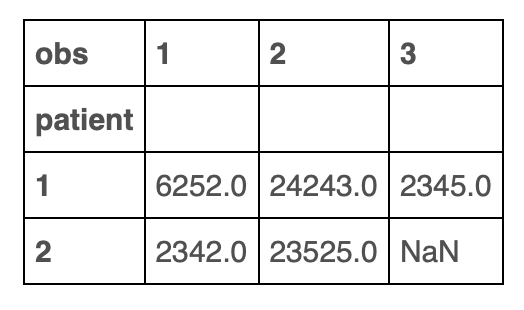

Long data is similar to _tidy_ data in the sense that each observation will be in a row and characteristics of these observations will be organized in columns. It looks like this: 

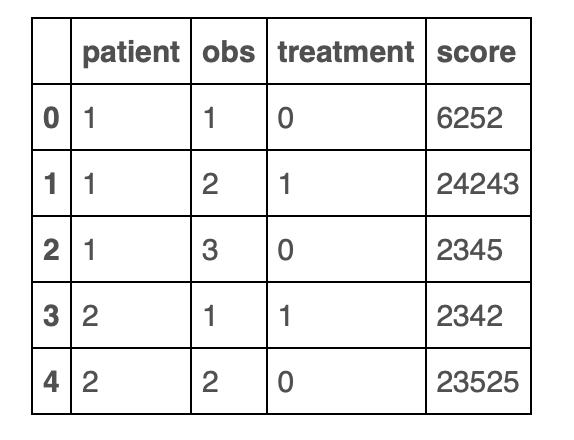

In `pandas` there's different ways of taking data from one shape to another one. Here we will explore some of this options and discuss its advantages and disadvantages. 


### 4.1. Long to wide

Well, `chicago_weather` is embarassangly long

In [ ]:
chicago_weather

But you can transform it to wide. Most of the times this tranformations are needed when you want to plot or make different calculations. The most useful transformation, at least for me is the ability of storing big data files taking less space on disk. 

In [ ]:
chicago_weather[['station', 'date', 'tmp']].pivot(index='station', columns='date', values='tmp')

You can also transform to wide in different directions! This one is useful for plotting, as we will see later. 

In [ ]:
chicago_weather_wide = chicago_weather[['station', 'date', 'tmp']].pivot(index='date', columns='station', values='tmp')
chicago_weather_wide

### 4.2 Long to wide format

Let's use our `chicago_weather_wide` data and put it back to the long format. Remember the data is "wider", so has observations on both rows and columns. 

In [ ]:
chicago_weather_wide.reset_index().melt(id_vars=['date'])

### 4.3 Merge data
 
Sometimes we have different data sources of related data. In our base case we have a dataframe of stations with station metadata and another dataframe with actual temperature data. We can combine data frames using common keys by `merging` data frames. 

There are two ways of combining datasets: 
 - Along columns: `merge()`
 - Along rows: `pd.concat()`

In [ ]:
chicago_weather_metadata = chicago_weather.merge(stations_il,
                                                 left_on=['station'],
                                                 right_on=['station_code'])
chicago_weather_metadata.head()

In [ ]:
chicago_weather.groupby('station').last()

## Section 5: Visualization

`Pandas` has extremely powerful plotting abilities off-the-shelf. Tey work pretty well if the data is formatted in the right direction. We will concentrate here on `pandas` + `matplotlib`, but we will cover viusualization extensively in the following days, particularly with other more friendly libraries, like `seaborn`

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
chicago_weather[['station', 'date', 'tmp']].pivot(index='date', columns='station', values='tmp').plot(ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
chicago_wide = chicago_weather[['station', 'date', 'tmp']].pivot(index='date', columns='station', values='tmp')
(chicago_wide.iloc[:,0] - chicago_wide.iloc[:, 1]).plot(ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
station_inventory.groupby('country').station_code.nunique().sort_values(ascending=False).head(10).plot(kind='barh', ax=ax)

# SOLUTIONS:

1)

In [ ]:
temp_tropical = np.random.default_rng().normal(20, 5, 366)
day_objs = pd.date_range('2020-01-01', '2020-12-31', freq='D')

pd.Series(temp_tropical, index=day_objs).mean()

2)

In [ ]:
df['anomaly_rainfall'] = df['rainfall'] - df['rainfall'].mean()
df[df.anomaly_rainfall < 0]

3)

In [ ]:
print(stations_il.age.mean())

4)

In [ ]:
matches = [bool(re.match(r"SANDY", name)) for name in local_file.NAME.tolist()]
data = local_file[matches]
data['WMO_WIND'] = pd.to_numeric(data['WMO_WIND'], errors = 'coerce')
data['LAT'] = pd.to_numeric(data['LAT'], errors = 'coerce')
data['LON'] = pd.to_numeric(data['LON'], errors = 'coerce')
data = data.dropna(subset=['WMO_WIND'])
sandy_2012 = data[data.SEASON == 2012]

sns.relplot(
    data=sandy_2012,
    x="LON", y="LAT", hue="WMO_WIND", style="NATURE",  size="WMO_WIND")